In [79]:
import DataPreparation.datacleaning
import importlib
importlib.reload(DataPreparation.datacleaning)
import pandas as pd
from dateutil.parser import parse 
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np
import missingno as msno
from matplotlib.dates import MonthLocator, DateFormatter

Data Cleaning

In [87]:
# Specify folder for cleaned data 
folder_path_data = '/Users/larascipio/Documents/Studie/datamijnen/Data'
file_name = 'cleaned_data.csv'

# Import and clean data 
data = pd.read_csv('/Users/larascipio/Documents/Studie/datamijnen/Data/dataset_mood_smartphone.csv')
cleaned = clean_data(data)

# Save the CSV file in the specified folder
cleaned.to_csv(f'{folder_path_data}/{file_name}', index=False)

/Users/larascipio/Documents/Studie/datamijnen/DataPreparation/datacleaning.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['date'] = valid_df['time'].dt.date
/Users/larascipio/Documents/Studie/datamijnen/DataPreparation/datacleaning.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['time'] = valid_df['time'].dt.time


Plot NA values

In [ ]:
# Specify folder for plots 
folder_path_plots = '/Users/larascipio/Documents/Studie/datamijnen/Plots'

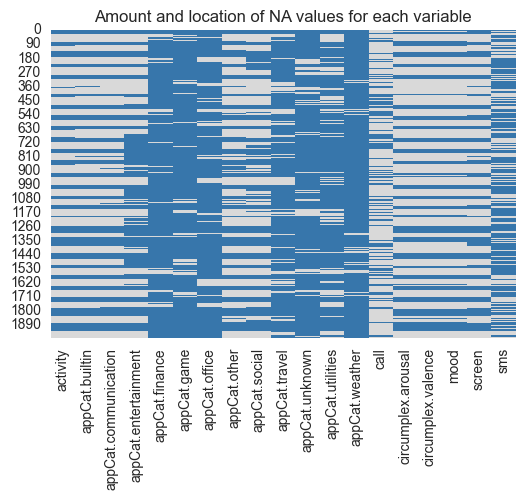

<Figure size 600x400 with 0 Axes>

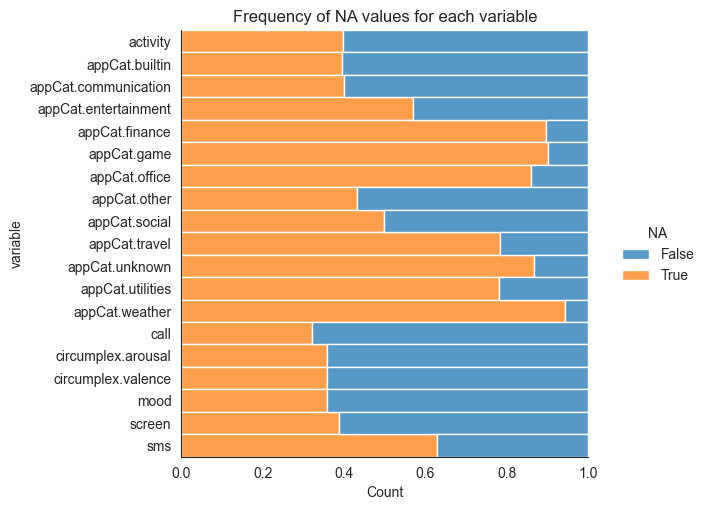

In [76]:
# Retrieve cleaned data set 
cleaned = pd.read_csv('/Users/larascipio/Documents/Studie/datamijnen/Data/cleaned_data.csv')

# Check the percentage of missing values in the new dataframe for each column
NA_percentages = cleaned.isnull().sum() / len(cleaned) * 100

# Drop the 'id' and 'date' columns from the data frame
NA_cleaned = cleaned.drop(['id', 'date'], axis=1)

# Create a binary data frame where missing values are True and non-missing values are False
binary_df = NA_cleaned.isna()
# Create a custom colormap with only two colors
colors = ['#d9d9d9', '#3776ab']
cmap = sns.color_palette(colors)

# Create a heatmap of the missing values 
plt.figure(figsize=(6, 4))
plt.title('Amount and location of NA values for each variable')
sns.heatmap(binary_df, cmap=cmap, cbar=False)

filename = 'plot_binary_NA.png'  # specify the file name
filepath = f'{folder_path_plots}/{filename}'  # combine folder and file names
plt.savefig(filepath)

plt.figure(figsize=(6, 4))
sns.displot(
    data=binary_df.melt(value_name="NA"),
    y="variable",
    hue="NA",
    multiple="fill",
    aspect=1.25
)
plt.title('Frequency of NA values for each variable')
filename = 'plot_frequency_NA.png'  # specify the file name
filepath = f'{folder_path_plots}/{filename}'  # combine folder and file names
plt.savefig(filepath)

Descriptive Stats

In [89]:
# Import original data
data = pd.read_csv('/Users/larascipio/Documents/Studie/datamijnen/Data/dataset_mood_smartphone.csv')

# Inspect the dataset
unique_variables = data.variable.unique()
unique_users = data.id.unique()
# all_dates = pd.date_range(start=data.time.min().round('D'), end=data.time.max().round('D'), freq='D')
print(f"Number of records: {len(data)}")
print(f"Number of attributes: {len(data.columns)}")
print(f"Attribute types:\n{data.dtypes}")
print(f"Ranges of values:\n{data['value'].describe()}")
print(f"Number of unique users:\n{len(unique_users)}")
print(f"Number of unique variables:\n{len(unique_variables)}")
print(f"Names of unique variables:\n{','.join(unique_variables)}")

# Get the minimum and maximum dates
min_date = data['time'].min()
max_date = data['time'].max()

# Print the date range
print('Date range:', min_date, 'to', max_date)

Number of records: 376912
Number of attributes: 5
Attribute types:
Unnamed: 0      int64
id             object
time           object
variable       object
value         float64
dtype: object
Ranges of values:
count    376710.000000
mean         40.665313
std         273.726007
min      -82798.871000
25%           2.025000
50%           7.029000
75%          29.356000
max       33960.246000
Name: value, dtype: float64
Number of unique users:
27
Number of unique variables:
19
Names of unique variables:
mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
Date range: 2014-02-17 07:00:52.197 to 2014-06-09 00:00:00.000


In [74]:
stats_general = pd.DataFrame({"Records": len(data),
                   "Variables": len(unique_variables),
                   "Users": len(unique_users),
                   "Dates": len(all_dates)},
                   index=['Amount of unique values'])

print(stats_general.to_markdown())
# Create table for variables 
stats_variables = data.groupby('variable').describe()['value'][['count', 'mean', 'std', 'min', 'max']]
print(stats_variables.to_markdown())

|                         |   Records |   Variables |   Users |   Dates |
|:------------------------|----------:|------------:|--------:|--------:|
| Amount of unique values |    376912 |          19 |      27 |     113 |
| variable             |   count |        mean |        std |            min |       max |
|:---------------------|--------:|------------:|-----------:|---------------:|----------:|
| activity             |   22965 |   0.115958  |   0.186946 |      0         |     1     |
| appCat.builtin       |   91288 |  18.5383    | 415.989    | -82798.9       | 33960.2   |
| appCat.communication |   74276 |  43.3438    | 128.913    |      0.006     |  9830.78  |
| appCat.entertainment |   27125 |  37.5765    | 262.96     |     -0.011     | 32148.7   |
| appCat.finance       |     939 |  21.7553    |  39.2184   |      0.131     |   355.513 |
| appCat.game          |     813 | 128.392     | 327.145    |      1.003     |  5491.79  |
| appCat.office        |    5642 |  22.5789    | 4

Plot Average Mood over Time

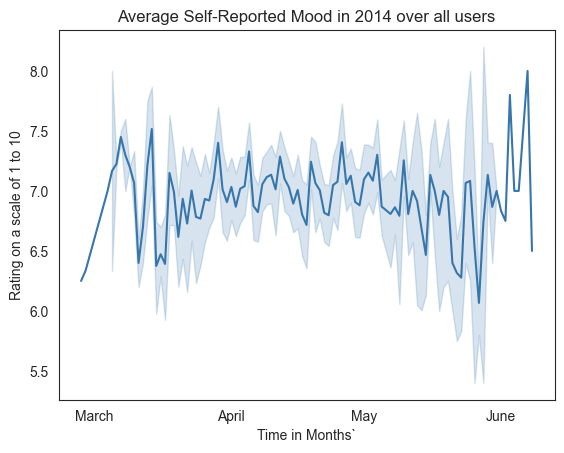

In [91]:
# Change to date type variable 
cleaned['date'] = pd.to_datetime(cleaned['date'])

# Create line plot 
sns.lineplot(x='date', y='mood', data=cleaned, color='#3776ab')

# Set x-axis ticks to be monthly
locator = MonthLocator()
plt.gca().xaxis.set_major_locator(locator)

# Format x-axis tick labels to show month names
formatter = DateFormatter('%B')
plt.gca().xaxis.set_major_formatter(formatter)

# Add axis labels and title
plt.xlabel('Time in Months`')
plt.ylabel('Rating on a scale of 1 to 10')
plt.title('Average Self-Reported Mood in 2014 over all users')

# Save plot
filename = 'lineplot_mood_time.png'  # specify the file name
filepath = f'{folder_path_plots}/{filename}'  # combine folder and file names
plt.savefig(filepath)

Plot Valence and Arousal over Time

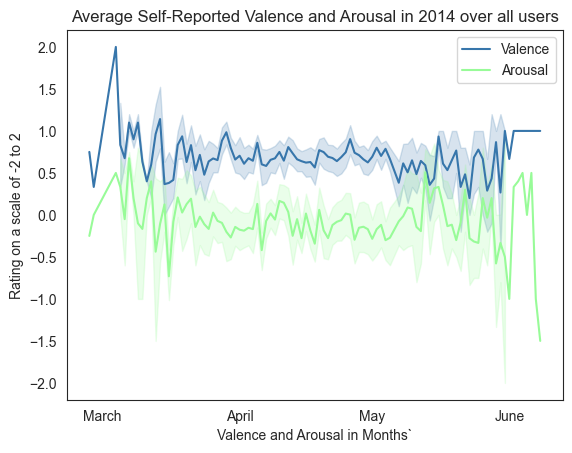

In [132]:
# Change to date type variable 
cleaned['date'] = pd.to_datetime(cleaned['date'])

# Create line plot 
sns.lineplot(x='date', y='circumplex.valence', data=cleaned, color='#3776ab', label='Valence')
sns.lineplot(x='date', y='circumplex.arousal', data=cleaned, color='palegreen', label='Arousal')

# Set x-axis ticks to be monthly
locator = MonthLocator()
plt.gca().xaxis.set_major_locator(locator)

# Format x-axis tick labels to show month names
formatter = DateFormatter('%B')
plt.gca().xaxis.set_major_formatter(formatter)

# Add axis labels and title
plt.xlabel('Valence and Arousal in Months`')
plt.ylabel('Rating on a scale of -2 to 2')
plt.title('Average Self-Reported Valence and Arousal in 2014 over all users')

# Add legend
plt.legend(loc='upper right')

# Show plot
# plt.show()

# Save plot
filename = 'lineplot_arousalvalence_time.png'  # specify the file name
filepath = f'{folder_path_plots}/{filename}'  # combine folder and file names
plt.savefig(filepath)

Plot individual users mood over time 

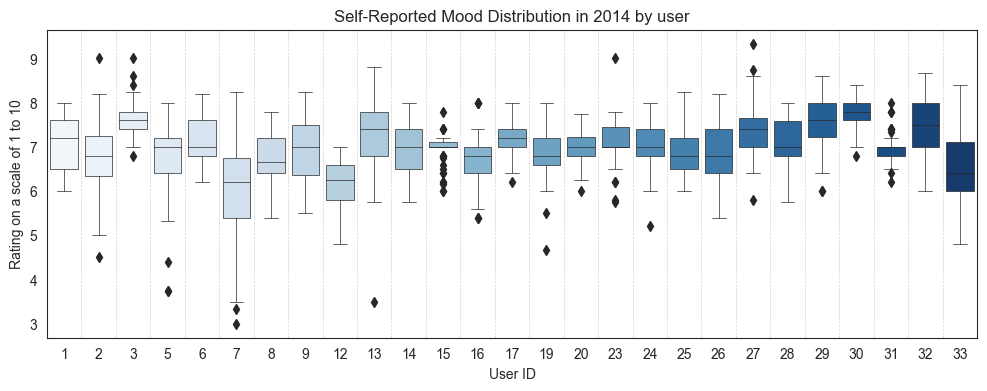

In [131]:
# print(cleaned['id'].unique())
# Change to date type variable 
cleaned['date'] = pd.to_datetime(cleaned['date'])

# Create a new column with user IDs rewritten as integers
cleaned['user_num'] = cleaned['id'].str.split('.').str[1].astype(int)

plt.figure(figsize=(12, 4))
# Create boxplots for each user ID
sns.boxplot(x='user_num', y='mood', data=cleaned, palette='Blues', linewidth=0.5)

# Set x-axis label and title
plt.xlabel('User ID')
plt.ylabel('Rating on a scale of 1 to 10')
plt.title('Self-Reported Mood Distribution in 2014 by user')

# Add vertical lines between the boxplots
for i in range(cleaned['user_num'].nunique() - 1):
    plt.axvline(i + 0.5, color='lightgray', linestyle='--', linewidth=0.5
)

# Show plot
# plt.show()

# Save plot
filename = 'boxplot_moodperuser_time.png'  # specify the file name
filepath = f'{folder_path_plots}/{filename}'  # combine folder and file names
plt.savefig(filepath)



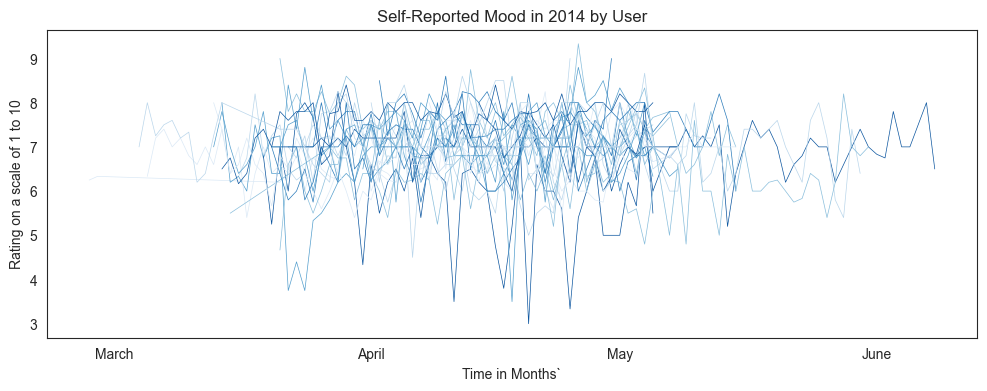

In [130]:
# Create a new figure
plt.figure(figsize=(12, 4))

# Loop over each user ID and create a line plot
for user_id in user_ids:
    user_data = cleaned[cleaned['id'] == user_id]
    sns.lineplot(x='date', y='mood', data=user_data, linewidth=0.5)

# Set x-axis ticks to be monthly
locator = MonthLocator()
plt.gca().xaxis.set_major_locator(locator)

# Format x-axis tick labels to show month names
formatter = DateFormatter('%B')
plt.gca().xaxis.set_major_formatter(formatter)

# Add axis labels and title
plt.xlabel('Time in Months`')
plt.ylabel('Rating on a scale of 1 to 10')
plt.title('Self-Reported Mood in 2014 by User')

# Show plot
# plt.show()

# Save plot
filename = 'lineplots_moodperuser_time.png'  # specify the file name
filepath = f'{folder_path_plots}/{filename}'  # combine folder and file names
plt.savefig(filepath)
